In [1]:
# To force reloading. Useful when editing python files
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from processor_new import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotting_hg import *

In [2]:
# Load profiler baseline
base_path = '/Users/sebastian/Documents/PharoImages/illi-df-hg-clean/profiler-data/hg/baseline/'

# Load sampling 0.1%
path = base_path + '0dot001'
hg_01, metadata_hg01 = load_df(path)

# Load sampling 1%
path = base_path + '0dot01'
hg_1, metadata_hg1 = load_df(path)

# Load sampling 50%
path = base_path + '0dot5'
hg_50, metadata_hg50 = load_df(path)

# Load sampling 100%
path = base_path + '1'
hg_100, metadata_hg100 = load_df(path)

# most allocated classes
top_allocated_classes = get_top_allocated_classes(hg_01)

In [4]:
ephemeron_size = 80

baseline_overhead = hg_100['sizeInBytes'].sum()
# add overhead according to the sampling rate
zero_one = baseline_overhead + (hg_01.shape[0] * ephemeron_size)
one = baseline_overhead + (hg_1.shape[0] * ephemeron_size)
fifty = baseline_overhead + (hg_50.shape[0] * ephemeron_size)
one_hundred = baseline_overhead + (hg_100.shape[0] * ephemeron_size)

# make relative
zero_one = zero_one / baseline_overhead
one = one / baseline_overhead
fifty = fifty / baseline_overhead
one_hundred = one_hundred / baseline_overhead

# round
zero_one = round(zero_one, 3)
one = round(one, 2)
fifty = round(fifty, 2)
one_hundred = round(one_hundred, 2)

print(one_hundred, '$\\times$')
print(fifty,  '$\\times$')
print(one,  '$\\times$')
print(zero_one,  '$\\times$')

3.34 $\times$
2.25 $\times$
1.03 $\times$
1.003 $\times$


In [4]:
print_table_allocations_average_lifetimes('', hg_50, metadata_hg50)



Sampling rate: 0.5
Total instances:  51557008
Total execution time: 54.972101
Total full GCs:  7
Total scavenges:  2081
Total allocated memory:  1.6663868278265  GiB
----------
Allocated object class    Instances    Avg lifetime    Avg GC cycles    Avg Scavenges    Allocated memory
------------------------  -----------  --------------  ---------------  ---------------  ------------------
HG2dPoint                 96.12%       0.05%           0.09%            0.1%             66.47%
Rectangle                 1.02%        0.09%           0.11%            0.14%            0.71%
Array                     0.74%        1.16%           1.43%            1.14%            3.89%
Bitmap                    0.22%        0.7%            0.63%            0.74%            24.15%
Form                      0.22%        0.08%           0.09%            0.12%            0.31%
LargePositiveInteger      0.21%        0.03%           0.04%            0.1%             0.1%
ByteString                0.21%     

In [10]:
print('Overall avg lifetime for 100% Sampling: ', str(hg_100['relativeLifetime'].mean()))
print('Overall avg lifetime for 50% Sampling: ', str(hg_50['relativeLifetime'].mean()))
print('Overall avg lifetime for 1% Sampling: ', str(hg_1['relativeLifetime'].mean()))
print('Overall avg lifetime for 0.1% Sampling: ', str(hg_01['relativeLifetime'].mean()))

Overall avg lifetime for 100% Sampling:  0.08810869663197647
Overall avg lifetime for 50% Sampling:  0.07942740343201855
Overall avg lifetime for 1% Sampling:  0.05139795303593463
Overall avg lifetime for 0.1% Sampling:  0.05757798963151001


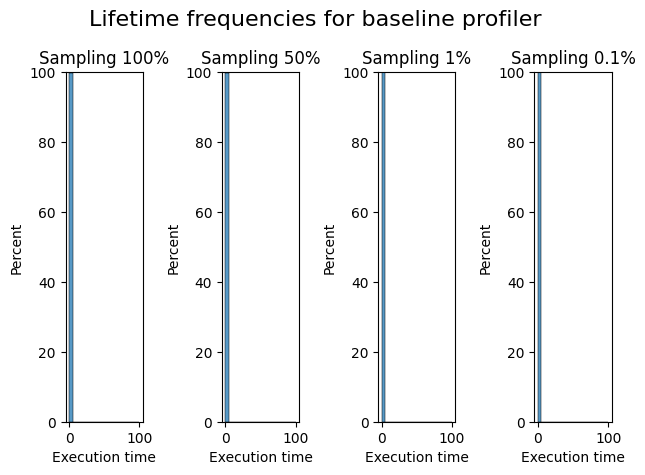

In [20]:
plot_relative_frequencies_histogram('baseline profiler', hg_100, hg_50, hg_1, hg_01)

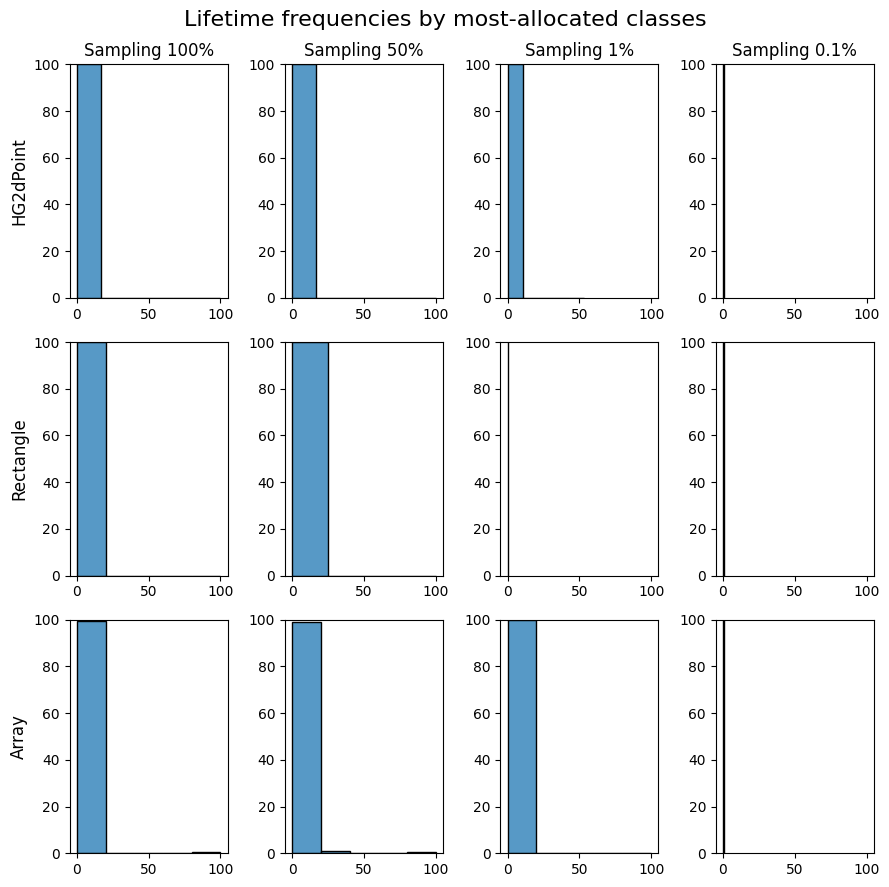

In [24]:
plot_lifetime_frequencies_by_class(hg_100, hg_50, hg_1, hg_01, "Lifetime frequencies by most-allocated classes", True)

In [12]:
# Load profiler actionable
base_path = '/Users/sebastian/Documents/PharoImages/illi-df-hg-clean/profiler-data/df/actionable/'

# Load sampling 0.1%
path = base_path + '0dot001'
hg_01_a, metadata_hg01_a = load_df(path)

# Load sampling 1%
path = base_path + '0dot01'
hg_1_a, metadata_hg1_a = load_df(path)

# Load sampling 50%
path = base_path + '0dot5'
hg_50_a, metadata_hg50_a = load_df(path)

# Load sampling 100%
path = base_path + '1'
hg_100_a, metadata_hg100_a = load_df(path)

In [13]:
print('Overall Actionable avg lifetime for 100% Sampling: ', str(hg_100_a['relativeLifetime'].mean()))
print('Overall Actionable avg lifetime for 50% Sampling: ', str(hg_50_a['relativeLifetime'].mean()))
print('Overall Actionable avg lifetime for 1% Sampling: ', str(hg_1_a['relativeLifetime'].mean()))
print('Overall Actionable avg lifetime for 0.1% Sampling: ', str(hg_01_a['relativeLifetime'].mean()))

Overall Actionable avg lifetime for 100% Sampling:  75.78104344311522
Overall Actionable avg lifetime for 50% Sampling:  56.24730725832556
Overall Actionable avg lifetime for 1% Sampling:  46.578984128938785
Overall Actionable avg lifetime for 0.1% Sampling:  47.473580410532094


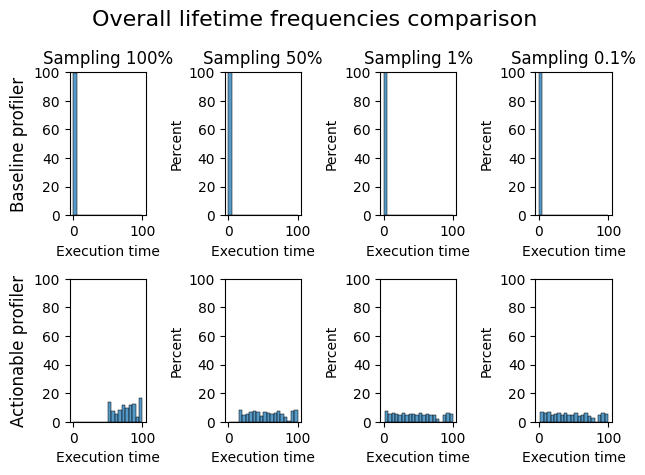

In [28]:
plot_relative_frequencies_histogram_comparison(hg_100, hg_50, hg_1, hg_01, hg_100_a, hg_50_a, hg_1_a, hg_01_a)

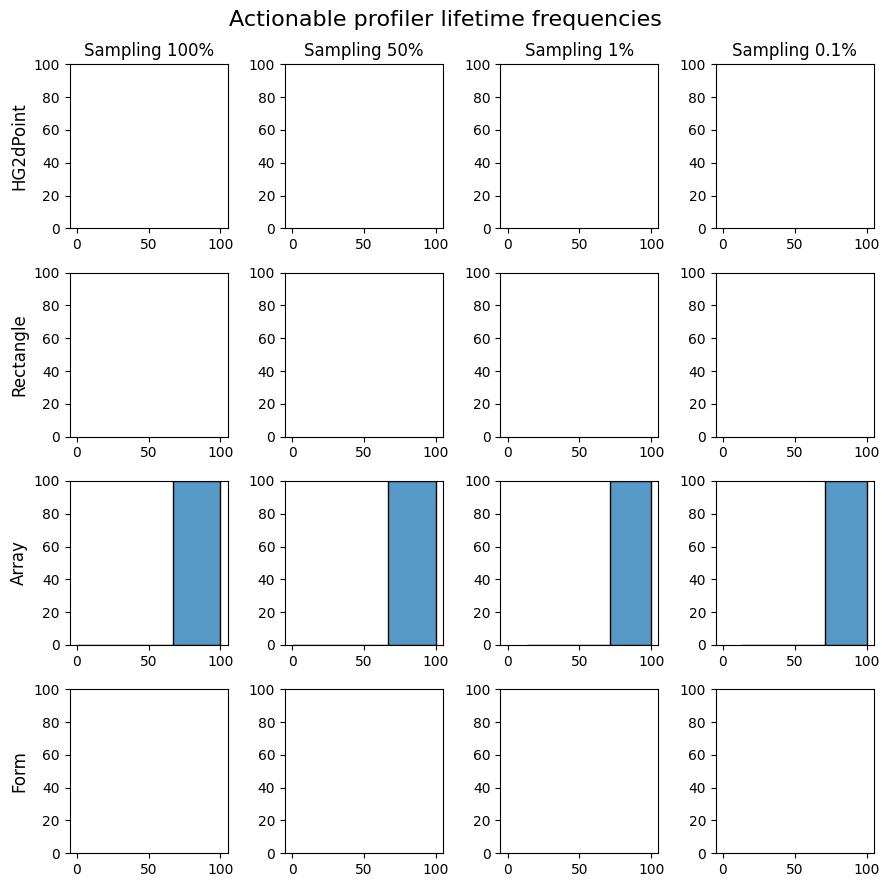

In [29]:
plot_lifetime_frequencies_by_class_actionable(hg_100_a, hg_50_a, hg_1_a, hg_01_a, "Actionable profiler lifetime frequencies", True)

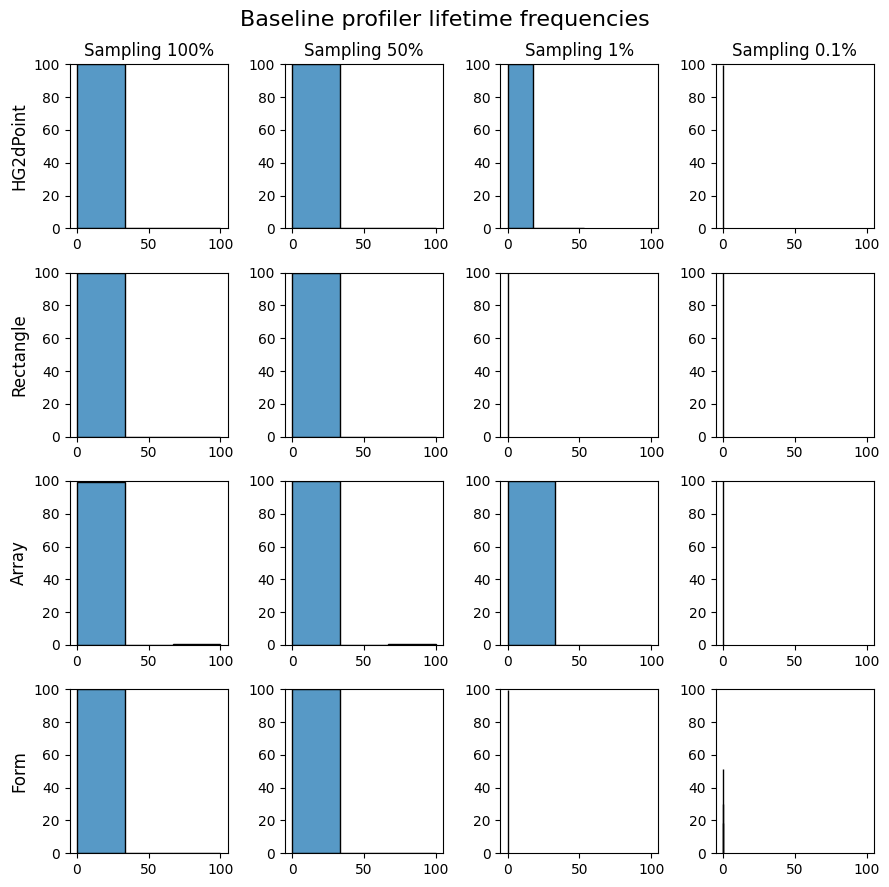

In [30]:
plot_lifetime_frequencies_by_class_actionable(hg_100, hg_50, hg_1, hg_01, "Baseline profiler lifetime frequencies", True)